In the world of finance, ratios are very important. It tells us how a company is doing in general and will it in the future be profitable of the investor. However, the accuarcy of these ratios are open to interpretation and how well the stock market is doing. They can be deceivable and give false information to an investor. Therefore, a much more rigorious analysis is required when an investor is only using these ratios to create portfolios. 

In this assignment we like to examine how we can use only the raw data from companies to make investing decisons. We look at financial indicators (accounting information) of 4500 companies in NYSE. We will create a portfolio of the healthy companies to minimize our risk, and then use this portoflio to estimate a yearly return on a similar portfolio. 

We will have a risk averse approach to this project.
We begin with fundemental ideas and in the paper we will view them more carefully and more in depth.


### Data
The following is an analysis of the data we used for this assignment:
* The data was taken from Kaggle website.
* The  folder that was downloaded had 5 years of data. That is 5 ".csv" files (2014-2018), each containing nearly to list of 4000 companies that are publicly traded on NYSE, and their yearly accounting information.
* Putting together this data is very hard.
* Due to how hard it must have been for the person gathering this information, and how companies redact certain information from their public statements for legal reasons, we did encounter discrepancies in our training exmaples. 
* We overcame this by getting rid of companies that did not provide full information. As an investor, we prefer to have access to full information.

### Approach
We first needed to decide how to approach this problem. Since we had many training examples, BUT no labels, we decided to use a clustering method. We used K-Means algorithm to create our final portfolio and then multiple linear regression to calculate our retruns. What follows is how to get our optimum portfolio, that is, healthy companies between 2014-2018.

Before we begin creating our clusters, let us see what value of K parameter is the best option for us. We will use the "elbow method" to find the best K value. The algorithm presented in class, was to loop through each K value iteratively and calculate the cost function. We then graph these values, and where there is an "elbow" we choose our K to be the tip of that elbow. 

Our goal was to accept 2 sensible K values and use them for our clustering script. 
* We began by importing our data.
* We then created two data frames. Both data frames will contain the features we need, but the difference will be that one of these dataframes will be normalized.
* We then ran our iterative loop for K values for both dataframes, saved the K and their corresponding cost values and created a plot to represent them.
* At the end we added the ratios to the normalized dataframe and did the same iterative step.

Let us see the results.

In [1]:
# Import the pacakges we need for this script.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #this is used for plot styling


# Begin by reading the original data.
df1 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame with features taken directly from the real data (df1).
# These features are also included in evaluating ratios but we start by using the raw values.
financial_data = pd.DataFrame(df1, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given. Notice that this will decrease our training exmamples by almost half.
nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans

# Let us see how data looks like
display(financial_data)

# Drop the symbols. If we keep the symbols then KMeans will not work since they are strings.
financial_data = financial_data.drop('Symbol', 1)

# Normalize the financial data.
# Each feature is in large dollar values, whereas some have variance. We are also going to add the ratios later. Therefore it 
# is a good idea to normalize the data before we do our clustering.
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']

,Symbol,Revenue,Revenue Growth,Gross Profit,Operating Income,Earnings before Tax,Free Cash Flow,Net Income,Total current assets,Operating Expenses,Net Debt,Short-term debt,Long-term debt,Total shareholders equity,Weighted Average Shs Out,Total current liabilities,Total debt,Total liabilities
0,CMCSA,9.450700e+10,0.1115,9.450700e+10,1.900900e+10,1.511100e+10,1.198500e+10,1.173100e+10,2.184800e+10,7.549800e+10,1.080000e+11,4.398000e+09,1.070000e+11,7.161300e+10,4.549505e+09,2.760300e+10,1.120000e+11,1.790000e+11
1,KMI,1.414400e+10,0.0320,6.856000e+09,3.794000e+09,2.196000e+09,2.119000e+09,1.609000e+09,5.722000e+09,3.062000e+09,3.404400e+10,3.388000e+09,3.393600e+10,3.367800e+10,2.207018e+09,7.557000e+09,3.732400e+10,4.366900e+10
2,INTC,7.084800e+10,0.1289,4.373700e+10,2.331600e+10,2.331700e+10,1.425100e+10,2.105300e+10,2.878700e+10,2.042100e+10,1.470900e+10,1.261000e+09,2.509800e+10,7.456300e+10,4.564000e+09,1.662600e+10,2.635900e+10,5.340000e+10
3,MU,3.039100e+10,0.4955,1.789100e+10,1.499400e+10,1.430300e+10,8.521000e+09,1.413500e+10,1.603900e+10,2.897000e+09,-2.163000e+09,8.590000e+08,3.780000e+09,3.229400e+10,1.159811e+09,5.754000e+09,4.639000e+09,1.011200e+10
5,BAC,9.124700e+10,0.0446,9.124700e+10,3.786600e+10,3.458400e+10,3.952000e+10,2.814700e+10,7.790000e+11,5.338100e+10,-4.440000e+11,3.797500e+10,2.290000e+11,2.650000e+11,9.814197e+09,1.890000e+12,4.370000e+11,2.090000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,WINA,7.251110e+07,0.0395,6.784070e+07,4.180240e+07,3.928310e+07,1.113870e+07,3.012550e+07,2.425130e+07,2.603830e+07,7.717500e+06,3.236100e+06,2.560490e+07,-4.808500e+06,3.901202e+06,1.248330e+07,2.884100e+07,5.147160e+07
4376,WINS,1.519838e+07,-0.3527,1.496750e+07,9.460981e+06,9.460981e+06,6.499370e+06,1.049988e+07,1.296404e+08,5.506514e+06,-5.380500e+06,1.772799e+07,1.847100e+07,2.742776e+08,1.983764e+07,2.225103e+07,1.847108e+07,3.494703e+07
4382,WVVI,2.307974e+07,0.1068,1.478150e+07,4.182715e+06,3.939586e+06,-2.959752e+06,2.858580e+06,2.863433e+07,1.059878e+07,-1.383677e+06,2.102474e+06,6.251316e+06,4.756027e+07,4.964529e+06,5.395262e+06,8.353790e+06,1.392227e+07
4385,XELB,3.546600e+07,0.1186,3.276400e+07,3.930000e+06,2.919000e+06,5.117000e+06,1.088000e+06,2.387500e+07,2.883400e+07,1.073800e+07,8.275000e+06,1.130000e+07,9.988200e+07,1.828454e+07,1.611600e+07,1.957500e+07,3.817700e+07


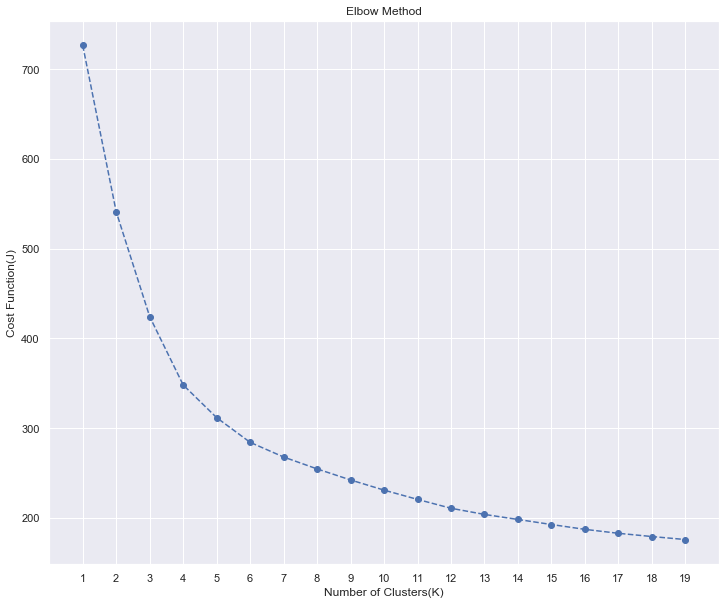

347.93608596908007


In [2]:
# Initialize the score values array and number of clusters for out loop. We used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters and the normailized data.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) 

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[3]) #possible elbow

The cost amount is lower this time due to normalization. However we have a hard time finding our elbow. If we look really closely we can find an elbow near $K=3$ and $K=4$, but we are not too sure about these values as our k values. Now let use financial ratios and see if they help us find a good K value.

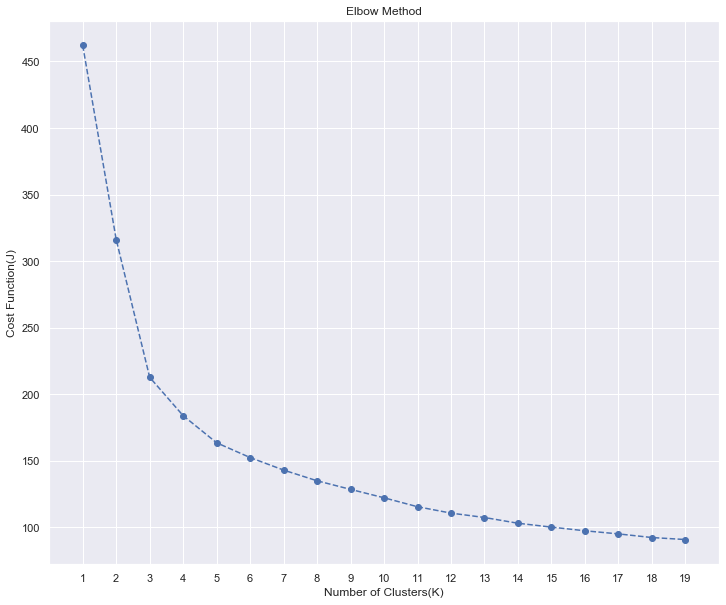

212.65867159140709


In [3]:
# We add the ratios to the original financial data, and then normalize. Same procedure as above.
# Calculate earnings per share ratio
financial_data['EarningsPerShare', ] = (df1['Net Income'] - df1['Preferred Dividends']) / df1['Weighted Average Shs Out']

# Get the P/E ratio directly from data
financial_data['PriceEarningsRatio'] = df1['PE ratio']

# Calculate debt to equity ratio
financial_data['DebtEquityRatio'] = (df1['Short-term debt'] + df1['Long-term debt']) / df1['Total shareholders equity']

# Get the return on equity ratio
financial_data['ReturnOnEquity'] = df1['returnOnEquity']

# Get the quick ratio
financial_data['QuickRatio'] = df1['quickRatio']

# Calculate the working capital ratio
financial_data['WorkingCapitalRatio'] = df1['Total current assets'] / df1['Total current liabilities']


nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities',
                                              'EarningsPerShare', 'PriceEarningsRatio', 'DebtEquityRatio',
                                              'ReturnOnEquity', 'QuickRatio', 'WorkingCapitalRatio']

cost = [0]*19
clusters = range(1, 20)
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters and the normailized data.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :])
    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print(cost[2]) #possible elbow

Eurika! The ratios helped us to find a nice elbow. It seems that they are not completely useless. We will not use them moving forward, but if you have paid close attention, we have features that encapsulate these ratios. 

We begin using the $K$ values we found from our elbow method and use it on our data. We found that if we use 
$K = 4$ and $K = 5$ we can get good clusters from the data given to us. We can also use $K=3$ but we need to bring the amount of risk as low as possible. In other words we like to be risk averse, even in finding the healthy companies.

We do this year by year. Every year will give us 9 clusters. 
That means we will have 4 clusters when $K=4$ and 5 when $K=5$. Each cluster will present companies that are healthy, semi healthy, not healthy and very unheathly.

Now the question will be how do we choose the best cluster from different $K$ values. We have high dimension data ($>$3D), so we cannot examine them visually. Therefore we need to use a feature as an indicator that belongs to a healthy company. We know that a good company has high revenues. High revenue indicates that a company is managing its wealth very well, has a good marketing department, and is able to pay outstanding debt at the end of the year. We could use net income as well, but there are some issues with using only net income. We will further dicuss these issues in the project paper.

High revenue however, does not mean a company is healthy, as we are ACTUALLY trying to find the healthy companies using clustering. It only means that a company's stock will be higher at the end of the year, since there is more demand for the stock as this is highly correlated with high revenue. These will be our "healthy" stocks. 

We will do this by creating a loop to get us each year's group of healthy stocks. This loop cycles through each year collecting the best group of stocks then eventually creates a master portfolio from all of the groups combined.


In [4]:
# Import the libraries we need for this project
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Begin by reading the original data
df2018 = pd.read_csv("2018_Financial_Data.csv")
df2017 = pd.read_csv("2017_Financial_Data.csv")
df2016 = pd.read_csv("2016_Financial_Data.csv")
df2015 = pd.read_csv("2015_Financial_Data.csv")
df2014 = pd.read_csv("2014_Financial_Data.csv")

# Insert data into list for iteration and initialize list to contain each year's groups
list_years = [df2018, df2017, df2016, df2015, df2014]
finalPortfolio_list = []

for j in range (0, len(list_years)):
    # Create the financial data frame we need with extra features taken directly from the real data (df)
    financial_data = pd.DataFrame(list_years[j], columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                                  'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                                  'Net Income', 'Total current assets',
                                                  'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                                  'Total shareholders equity', 'Weighted Average Shs Out', 
                                                  'Total current liabilities', 'Total debt', 'Total liabilities']) 

    # Get rid of empty values from the date given
    nan_value = float("NaN")
    financial_data.replace("", nan_value, inplace=True) #change empty data to nan
    financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
    financial_data.dropna(axis=0, inplace = True) #get rid of nans

    # Save the original data frame as target data frame
    target_data = financial_data

    # Drop the symbols for KMeans
    financial_data = financial_data.drop('Symbol', 1)

    # KMeans algorithm starts here
    kmeans = KMeans(n_clusters = 4,  random_state=None) # There is a difference of 1 company depending on the state chosen
    kmeans.fit(financial_data)
    y_k4means = kmeans.predict(financial_data)

    kmeans = KMeans(n_clusters = 5,  random_state=None)
    kmeans.fit(financial_data)
    y_k5means = kmeans.predict(financial_data)

    # This loop finds the average "Revenue" of each cluster (using 2 different cluster sizes)
    # It then indentifies the largest average and its associated cluster
    # The output are the companies within these "top" clusters
    largestMean_k4 = 0
    largestMean_k5 = 0
    for i in range(5):
        nportfolio_k5 = pd.DataFrame(target_data.loc[y_k5means == i, 'Revenue']).to_numpy()
        mean_k5 = nportfolio_k5.mean()
        if mean_k5 > largestMean_k5:
            largestMean_k5 = mean_k5
            cl_num_k5 = i 

        if i < 4:
            nportfolio_k4 = pd.DataFrame(target_data.loc[y_k4means == i, 'Revenue']).to_numpy()
            mean_k4 = nportfolio_k4.mean()
        if mean_k4 > largestMean_k4:
            largestMean_k4 = mean_k4
            cl_num_k4 = i

    # Find the cluster with highest average revnue and let that cluster be the "best" one from the others
    nportfolio_k5 = pd.DataFrame(target_data.loc[y_k5means == cl_num_k5, 'Symbol'])
    nportfolio_k4 = pd.DataFrame(target_data.loc[y_k4means == cl_num_k4, 'Symbol'])

    # Put these clusters in the group of best stocks
    tempPortfolio = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
    tempPortfolio = tempPortfolio.drop_duplicates(subset = 'Symbol', keep = 'first') #get rid of duplicates

    finalPortfolio_list.append(tempPortfolio) #start creating our final portfolio
    if j == 0:
        finalPortfolio = tempPortfolio
    else:
        finalPortfolio = finalPortfolio.append(tempPortfolio, ignore_index = True)
# Create Master Portfolio of the most healthy stocks
master_portfolio = finalPortfolio.drop_duplicates(subset = 'Symbol', keep = 'first')

We have a list of healthy companies during 2018. This is not a large list(35), however it is larger than the other years when we change our years. One reason as to why we have a "large" portfolio, can be that 2018 was a very volatile year. According to CNBC finances, the stock market S&P500 fell more than 6% during the year. When the market is volatile, there is more chance to create arbitrage. We also need to keep in mind that this is only for 2018. This does not mean that revenues have grown from last year. All we are saying is these stocks were healthy in 2018, and it is highly probable that they will stay that way for a period of time. 

We have our portfolio in 2017. We notice that there are less stocks in this portfolio. President Trump started working in 2017. He may be a bad politician, but he knows how to make his friends richer. The market grew this year, and it was less volatile. Just keep in mind that many things can affect health of a company, but volatility of market is one of the biggest ones. Also the "WMT" ticker stands for "Walmart INC". We will see this in other portfolios.

NOTE: To view results, uncomment appropriate year below.

In [10]:
#display(finalPortfolio_list[0])
#print("Year: 2018")

#display(finalPortfolio_list[1])
#print("Year: 2017")

#display(finalPortfolio_list[2])
#print("Year: 2016")

#display(finalPortfolio_list[3])
#print("Year: 2015")

#display(finalPortfolio_list[4])
#print("Year: 2014")

display(master_portfolio)

,Symbol
0,CMCSA
1,AAPL
2,MSFT
3,F
4,AIG
5,T
6,BBD
7,XOM
8,GM
9,VZ


So of 2000 companies from which we had "usable" information, we were able to generate 35-36 stocks for our final portfolio depending on the random state. This number is low, but these stocks are guaranteed to "perform" better than other companies.